In [1]:
Threads.nthreads()

36

In [3]:
using Distributions
using Random
using LinearAlgebra
using Plots
using StatsBase
using LaTeXStrings
using DataFrames
using CSV
using Base.Threads
using HDF5
gr()

Plots.GRBackend()

In [4]:
function ini()
    # Hund's Rule Ground J-Multiplet Ce3+ n4f=1
    n4f = 1
    L = 3
    S = 1 / 2
    J = L - S
    g = 1 + (J * (J + 1) + S * (S + 1) - L * (L + 1)) / (2 * J * (J + 1))
    Jz = [5 / 2, 3 / 2, 1 / 2, -1 / 2, -3 / 2, -5 / 2]
    return J, g, Jz
end
J, g, Jz = ini()

function para()
    n = 496 # temp length
    Temp_table = collect(0.5:0.1:50) # length 496
    noise = 0.2
    return n, Temp_table, noise
end
n, Temp_table, noise = para()

# 温度の長さを変更
function para2()
    n = 350 # temp length
    Temp_table = collect(0.2:02:70) # length 496
    noise = 0.2
    return n, Temp_table, noise
end
n, Temp_table, noise = para()

(496, [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4  …  49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0], 0.2)

In [5]:
function Onn_make(B40)
    #B40 = 0.1167
    B44 = 5 * B40

# O40
    O40_vec = (35 * Jz.^4 - 30 * J * (J + 1) * Jz.^2 + 25 * Jz.^2 .- 6 * J * (J + 1) .+ 3 * J^2 * (J + 1)^2) * B40
    O40 = diagm(0 => O40_vec)

# O44
    O44 = zeros(6, 6)

    Jz_vec_1 = Jz[1] .- collect(0:3)
    O44[5,1] = sqrt(prod(J .+ Jz_vec_1) * prod((J + 1) .- Jz_vec_1)) * B44 / 2

    Jz_vec_2 = Jz[2] .- collect(0:3)
    O44[6,2] = sqrt(prod(J .+ Jz_vec_2) * prod((J + 1) .- Jz_vec_2)) * B44 / 2

    Jz_vec_5 = Jz[5] .+ collect(0:3)
    O44[1,5] = sqrt(prod(J .- Jz_vec_5) * prod((J + 1) .+ Jz_vec_5)) * B44 / 2

    Jz_vec_6 = Jz[6] .+ collect(0:3)
    O44[2,6] = sqrt(prod(J .- Jz_vec_6) * prod((J + 1) .+ Jz_vec_6)) * B44 / 2

    Onn = O40 + O44

    return Onn
end

Onn_make (generic function with 1 method)

In [15]:
# 磁化率
function spc(Onn)
    magfield = 5
    magdir = [1,1,0]
    nor_magdir = magdir / sqrt(sum(magdir.^2))

# 対角要素 0

# 非対角要素
    Hmag_vec_1 = sqrt.((J .+ Jz) .* (J .- Jz .+ 1)) * (nor_magdir[1]+nor_magdir[2]*im)*magfield*g*0.67171/2
    Hmag_vec_1 = Hmag_vec_1[1:5]
    Hmag_1 = diagm(1 => Hmag_vec_1)
    
    Hmag_vec_2 = conj.(Hmag_vec_1)
    Hmag_2 = diagm(-1 => Hmag_vec_2)
    
    Hmag = Hmag_1 + Hmag_2

# 結晶場＋磁場ハミルトニアンの行列要素
    H = Onn + Hmag

    eigval, eigvec = eigen(H)

    SpcHeat_Temp = zeros(n)
    for (i, Temp) in enumerate(Temp_table)
        eigval_2 = - eigval / Temp
        eigval_2_max = maximum(eigval_2)
        eigval_ratio = eigval_2 .- eigval_2_max
        exp_eigval = exp.(eigval_ratio)

        Z0 = sum(exp_eigval)
        Z1 = sum(eigval_2 .* exp_eigval)
        Z2 = sum(eigval_2.^2 .* exp_eigval)
        
        #比熱
        SpcHeat=(- (Z1/Z0)^2 + (Z2/Z0) )*8.31441
        SpcHeat_Temp[i] = SpcHeat
    end
    return SpcHeat_Temp, Hmag
end

spc (generic function with 1 method)

In [11]:
SpcHeat_Temp = spc(Onn_make(0.1167))
SpcHeat_Temp_noise = SpcHeat_Temp + rand([-1,1]) * noise * randn(n);

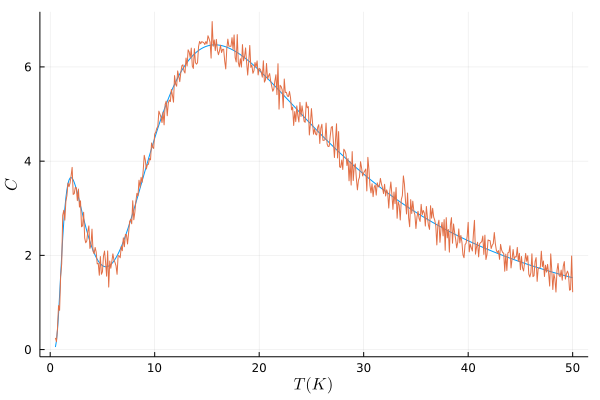

In [12]:
plot(Temp_table,SpcHeat_Temp)
plot!(Temp_table,SpcHeat_Temp_noise)
plot!(xlabel=L"T(K)",ylabel=L"C",legend=false)

In [13]:
function para1()
    L = 26 # レプリカ数
    gamma = 1.1
    C = 0.1
    d = 1.1
    return L, gamma, C, d
end
L, gamma, C, d = para1()

function para2()
    xi = 2
    nu = 0
    return xi,nu
end
xi,nu = para2()

(2, 0)

In [14]:
function beta_list()
    beta = zeros(L)
    for i in 2:L
        beta[i] = gamma^(i - L)
    end
    return beta
end
beta = beta_list()

26-element Vector{Float64}:
 0.0
 0.10152559799477044
 0.11167815779424749
 0.12284597357367225
 0.13513057093103947
 0.14864362802414344
 0.16350799082655781
 0.1798587899092136
 0.19784466890013497
 0.2176291357901485
 0.23939204936916336
 0.26333125430607973
 0.28966437973668774
 0.3186308177103565
 0.3504938994813922
 0.3855432894295314
 0.4240976183724846
 0.4665073802097331
 0.5131581182307065
 0.5644739300537771
 0.6209213230591549
 0.6830134553650705
 0.7513148009015775
 0.8264462809917354
 0.9090909090909091
 1.0

In [15]:
function step_list()
    step = ones(L) * C
    for i in 1:L
        if n * beta[i] > 1
            step[i] = C / (n * beta[i])^d
        end
    end
    return step
end
step_size = step_list()

26-element Vector{Float64}:
 0.1
 0.0013419521919343213
 0.001208384345411978
 0.0010881108395761688
 0.0009798084555617903
 0.000882285677775548
 0.0007944695851410394
 0.0007153940470908868
 0.0006441890944411949
 0.0005800713482093677
 0.0005223354010755449
 0.0004703460566686618
 0.00042353134129571364
 0.0003813762112310229
 0.0003434168863346922
 0.00030923574766013486
 0.00027845674291544683
 0.0002507412492306596
 0.00022578434771408117
 0.00020331146881132978
 0.00018307537156014468
 0.00016485342350749515
 0.00014844515136331907
 0.00013367003544380033
 0.00012036552363920428
 0.00010838524305644445

In [16]:
function prior_list(B40_list)
    prior_40_list = sqrt(xi / 2 * pi) * exp.(- xi * (B40_list .- nu).^2 / 2)
    return prior_40_list
end

prior_list (generic function with 1 method)

In [17]:
function error(B40)
    error_value = sum((SpcHeat_Temp_noise - spc(Onn_make(B40))).^2)/(2*n)
    return error_value
end

error (generic function with 1 method)

In [71]:
function error_list(B40_list)
    error_ls = zeros(L)
    @threads for i in 1:L
    #for i in 1:L
        error_value = error(B40_list[i])
        error_ls[i] = error_value
    end
    return error_ls
end


error_list (generic function with 1 method)

In [73]:
B40_test = collect(-0.5:0.001:0.5)
error_test_list = zeros(length(B40_test))
@threads for i in 1:(length(B40_test))
    error_test_list[i] = error(B40_test[i])
end

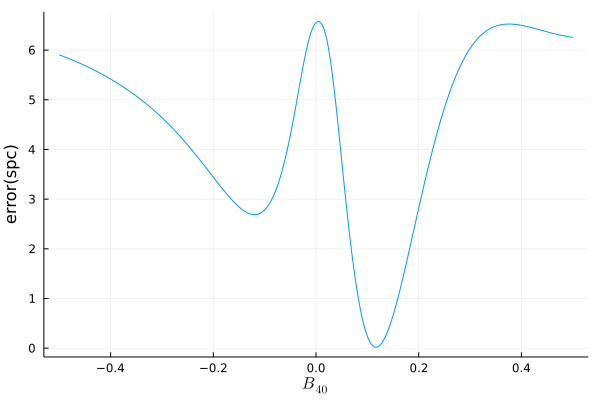

In [74]:
plot(B40_test,error_test_list)
plot!(xlabel=L"B_{40}",ylabel="error(spc)")
plot!(legend=false)

In [75]:
answer_1 = B40_test[argmin(error_test_list)]
print("大域解:",answer_1)

大域解:0.117

In [76]:
error_test_list_2 = error_test_list[1:Int64(floor(length(B40_test)/2))]
answer_2 = B40_test[argmin(error_test_list_2)]
print("局所解:",answer_2)

局所解:-0.12

In [77]:
# metropolis
function metropolis(B40_list, saitaku)
    B40_proposed = B40_list + rand([-1,1],L) .* step_size
    
    prior_ratio = prior_list(B40_proposed) ./ prior_list(B40_list)
    error_dif = error_list(B40_proposed) - error_list(B40_list)
    
    bit_vec = rand(L) .< exp.(- n / noise * beta .* error_dif) .* prior_ratio
    for i in 1:L
        if bit_vec[i] == 0 # 交換しない
            B40_proposed[i] = B40_list[i]
        else #交換
            saitaku[i] += 1
        end
    end
    return B40_proposed, saitaku
end

metropolis (generic function with 1 method)

In [78]:
# metropolis(採択率不要ver)
function metropolis_2(B40_list)
    B40_proposed = B40_list + rand([-1,1],L) .* step_size
    
    prior_ratio = prior_list(B40_proposed) ./ prior_list(B40_list)
    error_dif = error_list(B40_proposed) - error_list(B40_list)
    
    bit_vec = rand(L) .< exp.(- n / noise * beta .* error_dif) .* prior_ratio
    for i in 1:L
        if bit_vec[i] == 0 # 交換しない
            B40_proposed[i] = B40_list[i]
        end
    end
    return B40_proposed
end

metropolis_2 (generic function with 1 method)

In [79]:
# exchange
function exchange(B40_list, koukann, koukann_total)
    #レプリカからランダムに選択
    l = rand(collect(1:L-1))
    
    beta_dif = beta[l + 1] - beta[l]
    error_dif = error(B40_list[l + 1]) - error(B40_list[l])
    v = exp(n / noise * beta_dif * error_dif)
    u = minimum([1,v])
    items = [1,0]
    weights = [u,1 - u]
    item = sample(items, Weights(weights)) # 1で交換
    
    #交換
    if item == 1
        B40_list[l + 1], B40_list[l] = B40_list[l], B40_list[l + 1]
        koukann[l] += 1
    end
    
    #レプリカ選択の記録
    koukann_total[l] += 1
    return　B40_list, koukann, koukann_total
end


exchange (generic function with 1 method)

In [80]:
# exchange(交換率不要ver)
function exchange_2(B40_list)
    #レプリカからランダムに選択
    l = rand(collect(1:L-1))
    
    beta_dif = beta[l + 1] - beta[l]
    error_dif = error(B40_list[l + 1]) - error(B40_list[l])
    v = exp(n / noise * beta_dif * error_dif)
    u = minimum([1,v])
    items = [1,0]
    weights = [u,1 - u]
    item = sample(items, Weights(weights)) # 1で交換
    
    if item == 1
        B40_list[l + 1], B40_list[l] = B40_list[l], B40_list[l + 1]
    end

    return　B40_list
end

exchange_2 (generic function with 1 method)

In [81]:
B40_test = collect(-0.5:0.01:0.5)
error_test_list = zeros(length(B40_test))
for i in 1:(length(B40_test))
    error_test_list[i] = error(B40_test[i])
end

In [82]:
# exmc
function emc(size_simu, burn_in, frequency_exchange)
    # 初期パラメータ値
    B40_list = nu .+ rand([-1,1],L) .* randn(L) / sqrt(xi)
    
    #格納用(beta=1の値を保存)
    B40_keep = zeros(size_simu-burn_in)
    
    #採択率,交換率記録
    saitaku = zeros(L)
    koukann = zeros(L)
    koukann_total = zeros(L)
    
    # 更新
    p = Progress(burn_in; showspeed=true)
    q = Progress(size_simu-burn_in; showspeed=true)
    
    #バーンイン区間
    for iter in 1:burn_in
        B40_list = metropolis_2(B40_list)
        
        if iter % frequency_exchange == 0
            B40_list = exchange_2(B40_list)
        end
        
        ProgressMeter.next!(p)
    end
    
    #バーンイン終了後
    for iter in 1:size_simu-burn_in
        B40_list, saitaku = metropolis(B40_list, saitaku)
        
        if iter % frequency_exchange == 0
            B40_list, koukann = exchange(B40_list, koukann,koukann_total)
        end
        
        B40_keep[iter] = B40_list[end]
        ProgressMeter.next!(q)
    end
    
    
    saitaku = saitaku / size_simu
    koukann = koukann ./ koukann_total
    
    return B40_keep,saitaku,koukann
end

emc (generic function with 1 method)

In [83]:
B40_list,saitaku,koukann = emc(50000, 25000, 2)

Progress: 100%|███████████████████████████| Time: 0:09:44 (23.39 ms/it)
Progress: 100%|███████████████████████████| Time: 0:19:41 (47.27 ms/it)mt)m


([0.11573208131261953, 0.11562369606956309, 0.11573208131261953, 0.11562369606956309, 0.11573208131261953, 0.11573208131261953, 0.11562369606956309, 0.11551531082650665, 0.11562369606956309, 0.11573208131261953  …  0.11707742805269544, 0.11707742805269544, 0.116969042809639, 0.11707742805269544, 0.116969042809639, 0.11707742805269544, 0.116969042809639, 0.11686065756658257, 0.11675227232352613, 0.11676458947216342], [0.473, 0.3426, 0.35134, 0.36052, 0.36986, 0.37658, 0.3829, 0.3886, 0.39542, 0.39918  …  0.43154, 0.43392, 0.43742, 0.4406, 0.44654, 0.45104, 0.45412, 0.45506, 0.45828, 0.45994], [0.0, 0.964, 0.981404958677686, 0.9638783269961977, 0.9799196787148594, 0.9713701431492843, 0.9770354906054279, 0.9647058823529412, 0.9705882352941176, 0.9586466165413534  …  0.9695121951219512, 0.9683168316831683, 0.9683794466403162, 0.9731404958677686, 0.954183266932271, 0.9675456389452333, 0.9639468690702088, 0.9742489270386266, 0.9760479041916168, NaN])

In [84]:
df = DataFrame(
           beta_list=beta,
           採択率_B40=saitaku,
           交換率=koukann)

,beta_list,採択率_B40,交換率
,Float64,Float64,Float64
1,0.0,0.473,0.0
2,0.101526,0.3426,0.964
3,0.111678,0.35134,0.981405
4,0.122846,0.36052,0.963878
5,0.135131,0.36986,0.97992
6,0.148644,0.37658,0.97137
7,0.163508,0.3829,0.977035
8,0.179859,0.3886,0.964706
9,0.197845,0.39542,0.970588


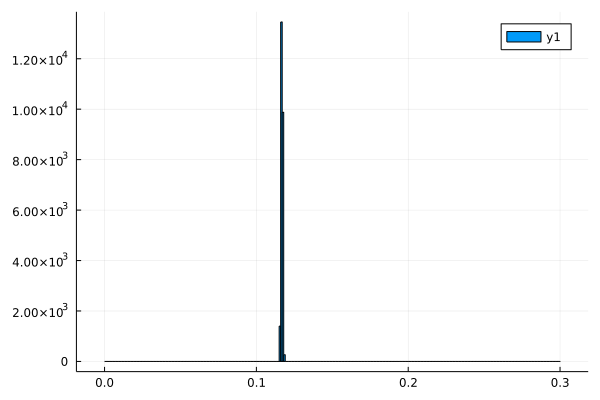

In [90]:
histogram(B40_list; bin=range(0, 0.3, step=0.001))

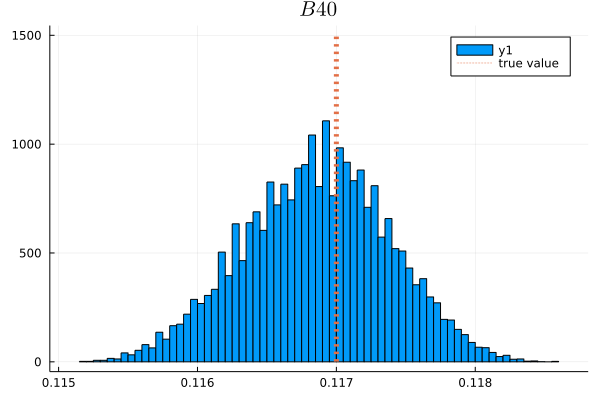

In [85]:
plot(B40_list,st=:histogram)
plot!(title=L"B40")
plot!(answer_1*ones(1500),collect(1:1500), linestyle=:dot,linewidth = 5,label="true value")

In [87]:
function error_min_find(B40_list)
    error_list = zeros(length(B40_list))
    @threads for i in 1:length(B40_list)
        error_list[i] = error(B40_list[i])
    end
    estimate_para = B40_list[argmin(error_list)]
    return estimate_para
end

error_min_find (generic function with 1 method)

In [88]:
estimate_para = error_min_find(B40_list)

println("estimate parameter:",estimate_para)
println("true value:",answer_1)

estimate parameter:0.11685083012741959
true value:0.117


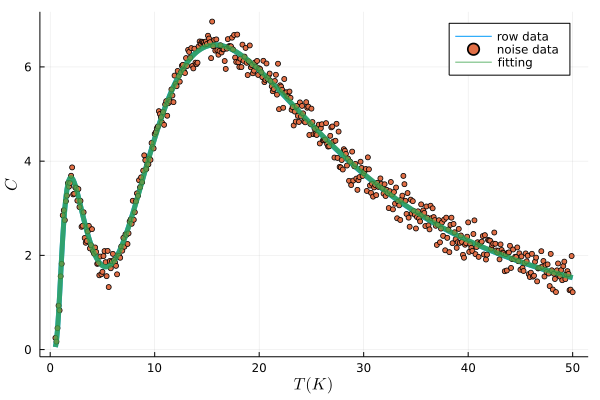

In [89]:
plot(Temp_table,SpcHeat_Temp, linewidth = 5, label = "row data")
plot!(Temp_table,SpcHeat_Temp_noise,st = :scatter,markersize = 3, label = "noise data")
plot!(Temp_table,spc(Onn_make(estimate_para)),linewidth = 5, alpha = 0.8, label = "fitting")
plot!(xlabel=L"T(K)",ylabel=L"C")

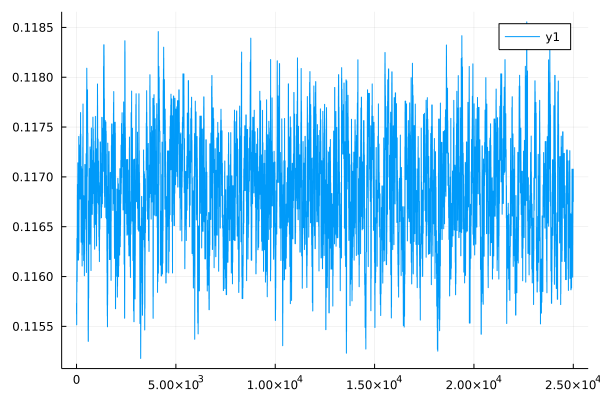

In [91]:
plot(B40_list)

In [92]:
df = DataFrame(
           B40=B40_list
)

,B40
,Float64
1,0.115732
2,0.115624
3,0.115732
4,0.115624
5,0.115732
6,0.115732
7,0.115624
8,0.115515
9,0.115624


In [93]:
df |> CSV.write("/Users/nishimurarei/home/lab/data/210921/spc.csv",delim=",",writeheader=true)

"/Users/nishimurarei/home/lab/data/210921/spc.csv"